# this notebook analyzes my bank account

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, timedelta
import calendar
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

## load the data and preprocess it

In [2]:
#load data
dtypes = {'date':'str','valeur':'str','nature_operation':'str','debit':'float32','credit':'float32'}
data = pd.read_csv('final_data.csv', dtype = dtypes)
data.drop(data.columns[0], axis = 1, inplace = True)

In [3]:
#change dtype
data.date = pd.to_datetime(data.date, dayfirst = True)
data.valeur = pd.to_datetime(data.valeur, dayfirst = True)

In [4]:
pd.set_option('display.max_rows', data.shape[0]+1)

In [5]:
data

,date,valeur,nature_operation,debit,credit
0,2020-11-09,2020-11-09,CARTE X9328 REMBT 08/11 SNCF INTERNET COMMERCE...,0.000000,22.000000
1,2020-11-12,2020-11-12,CARTE X9328 04/11 FNAC.COM COMMERCE ELECTRONIQUE,349.000000,0.000000
2,2020-11-12,2020-11-12,CARTE X9328 10/11 VELIB METROPOLE COMMERCE ELE...,7.100000,0.000000
3,2020-11-12,2020-11-12,PRELEVEMENT EUROPEEN 4306384889 DE: ELECTRICIT...,68.000000,0.000000
4,2020-11-12,2020-11-12,000001 VIR EUROPEEN EMIS LOGITEL POUR: Barthel...,820.000000,0.000000
5,2020-11-13,2020-11-16,REMISE CHEQUE 0000027 318 DE 1 CHQ 01001 0000027,0.000000,30.000000
6,2020-11-16,2020-11-16,CARTE X9328 12/11 LE MOULIN DES BL,6.900000,0.000000
7,2020-11-16,2020-11-16,CARTE X9328 14/11 SM CASINO CS501,189.220001,0.000000
8,2020-11-17,2020-11-17,COTISATION JAZZ-25 ANS -50%,4.400000,0.000000
9,2020-11-19,2020-11-19,CARTE X9328 18/11 Spotify P1232A1DCF EUR SUEDE,4.990000,0.000000


In [6]:
data['dt'] = data.date.diff()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   date              300 non-null    datetime64[ns] 
 1   valeur            300 non-null    datetime64[ns] 
 2   nature_operation  300 non-null    object         
 3   debit             300 non-null    float32        
 4   credit            300 non-null    float32        
 5   dt                299 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float32(2), object(1), timedelta64[ns](1)
memory usage: 11.8+ KB


In [8]:
data.dt = data.dt.dt.days

In [9]:
data = data.fillna(0)

In [10]:
start_date = data.date[0]
dates = {start_date:0}
for i in range(1,7):
    days_in_month = calendar.monthrange(start_date.year, start_date.month)[1]
    new_limit = start_date + timedelta(days=days_in_month)
    dates[new_limit] = i
    start_date = new_limit

In [11]:
def find_date(dates, date):
    month = 0
    for d_lim in dates.keys():
        if date > d_lim:
            month = dates[d_lim]
    return month

In [12]:
data['month'] = data.date.apply(lambda x: find_date(dates, x))

In [13]:
data

,date,valeur,nature_operation,debit,credit,dt,month
0,2020-11-09,2020-11-09,CARTE X9328 REMBT 08/11 SNCF INTERNET COMMERCE...,0.000000,22.000000,0.0,0
1,2020-11-12,2020-11-12,CARTE X9328 04/11 FNAC.COM COMMERCE ELECTRONIQUE,349.000000,0.000000,3.0,0
2,2020-11-12,2020-11-12,CARTE X9328 10/11 VELIB METROPOLE COMMERCE ELE...,7.100000,0.000000,0.0,0
3,2020-11-12,2020-11-12,PRELEVEMENT EUROPEEN 4306384889 DE: ELECTRICIT...,68.000000,0.000000,0.0,0
4,2020-11-12,2020-11-12,000001 VIR EUROPEEN EMIS LOGITEL POUR: Barthel...,820.000000,0.000000,0.0,0
5,2020-11-13,2020-11-16,REMISE CHEQUE 0000027 318 DE 1 CHQ 01001 0000027,0.000000,30.000000,1.0,0
6,2020-11-16,2020-11-16,CARTE X9328 12/11 LE MOULIN DES BL,6.900000,0.000000,3.0,0
7,2020-11-16,2020-11-16,CARTE X9328 14/11 SM CASINO CS501,189.220001,0.000000,0.0,0
8,2020-11-17,2020-11-17,COTISATION JAZZ-25 ANS -50%,4.400000,0.000000,1.0,0
9,2020-11-19,2020-11-19,CARTE X9328 18/11 Spotify P1232A1DCF EUR SUEDE,4.990000,0.000000,2.0,0


## add some interesting features

In [14]:
cumsum = data[['debit','credit','month']].groupby('month').cumsum()

In [15]:
cumsum.columns = ['cum_debit','cum_credit']

<AxesSubplot:xlabel='date', ylabel='debit'>

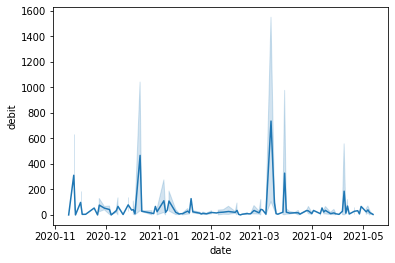

In [16]:
sns.lineplot(x = data.date, y = data.debit)

In [17]:
data = data.join(cumsum, how = 'inner')

<AxesSubplot:xlabel='date', ylabel='cum_credit'>

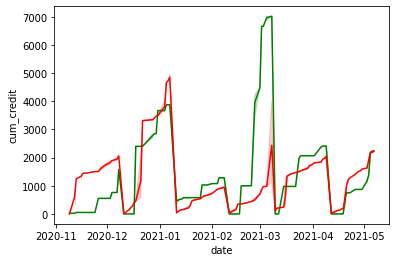

In [18]:
sns.lineplot(x = data.date, y = data.cum_credit, color = 'g')
sns.lineplot(x = data.date, y = data.cum_debit, color = 'r')

In [19]:
#difference of cumulatives => rolling treasury
data['diff'] = data['cum_credit'] - data['cum_debit']

In [20]:
data

,date,valeur,nature_operation,debit,credit,dt,month,cum_debit,cum_credit,diff
0,2020-11-09,2020-11-09,CARTE X9328 REMBT 08/11 SNCF INTERNET COMMERCE...,0.000000,22.000000,0.0,0,0.000000,22.000000,22.000000
1,2020-11-12,2020-11-12,CARTE X9328 04/11 FNAC.COM COMMERCE ELECTRONIQUE,349.000000,0.000000,3.0,0,349.000000,22.000000,-327.000000
2,2020-11-12,2020-11-12,CARTE X9328 10/11 VELIB METROPOLE COMMERCE ELE...,7.100000,0.000000,0.0,0,356.100006,22.000000,-334.100006
3,2020-11-12,2020-11-12,PRELEVEMENT EUROPEEN 4306384889 DE: ELECTRICIT...,68.000000,0.000000,0.0,0,424.100006,22.000000,-402.100006
4,2020-11-12,2020-11-12,000001 VIR EUROPEEN EMIS LOGITEL POUR: Barthel...,820.000000,0.000000,0.0,0,1244.099976,22.000000,-1222.099976
5,2020-11-13,2020-11-16,REMISE CHEQUE 0000027 318 DE 1 CHQ 01001 0000027,0.000000,30.000000,1.0,0,1244.099976,52.000000,-1192.099976
6,2020-11-16,2020-11-16,CARTE X9328 12/11 LE MOULIN DES BL,6.900000,0.000000,3.0,0,1251.000000,52.000000,-1199.000000
7,2020-11-16,2020-11-16,CARTE X9328 14/11 SM CASINO CS501,189.220001,0.000000,0.0,0,1440.219971,52.000000,-1388.219971
8,2020-11-17,2020-11-17,COTISATION JAZZ-25 ANS -50%,4.400000,0.000000,1.0,0,1444.619995,52.000000,-1392.619995
9,2020-11-19,2020-11-19,CARTE X9328 18/11 Spotify P1232A1DCF EUR SUEDE,4.990000,0.000000,2.0,0,1449.609985,52.000000,-1397.609985


<AxesSubplot:xlabel='date', ylabel='diff'>

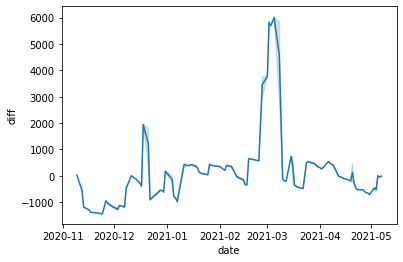

In [21]:
sns.lineplot(x = data.date, y = data['diff'])

In [22]:
# difference day to day
data['diff_d2d'] = data['credit'] - data['debit']

<AxesSubplot:xlabel='date', ylabel='diff_d2d'>

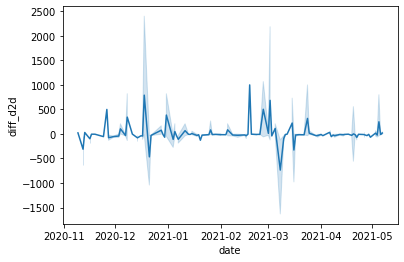

In [23]:
sns.lineplot(x = data.date, y = data['diff_d2d'])

In [24]:
data[['credit','debit','month']].groupby('month').sum()

,credit,debit
month,,
0,1580.000000,2121.600098
1,3878.000000,4950.120117
2,1286.380005,979.400024
3,7023.500000,6879.609863
4,2410.580078,2099.020020
5,2225.000000,2245.469971


## time to analyze "nature_operation" feature

In [25]:
data.nature_operation.values

array(['CARTE X9328 REMBT 08/11 SNCF INTERNET COMMERCE ELECTRONIQUE ',
       'CARTE X9328 04/11 FNAC.COM COMMERCE ELECTRONIQUE ',
       'CARTE X9328 10/11 VELIB METROPOLE COMMERCE ELECTRONIQUE ',
       'PRELEVEMENT EUROPEEN 4306384889 DE: ELECTRICITE DE FRANCE ID: FR47EDF001007 MOTIF: Numero de client : 6018532526 - Num ero de compte : XXX 004035321214 REF: Z029678097737 11405 1 SIMM 114 MANDAT MM9760185325260001 ',
       '000001 VIR EUROPEEN EMIS LOGITEL POUR: Barthelemy Francois 12 11 BQ 3005600030 CPT 00300025260 REF: 9031749563377 MOTIF: Loyer novembre CHEZ: CCFRFRPP ',
       'REMISE CHEQUE 0000027 318 DE 1 CHQ 01001 0000027 ',
       'CARTE X9328 12/11 LE MOULIN DES BL ',
       'CARTE X9328 14/11 SM CASINO CS501 ',
       'COTISATION JAZZ-25 ANS -50% ',
       'CARTE X9328 18/11 Spotify P1232A1DCF EUR SUEDE ',
       'CARTE X9328 23/11 IGN VADS COMMERCE ELECTRONIQUE ',
       'VIR RECU 9033153899141 DE: M. VICTOR BOSSARD ',
       'CARTE X9328 26/11 CARREFOUR MARKET ',
     

In [26]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC_victor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC_victor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

In [28]:
text_process(data.nature_operation.values[0])

['carte', 'x', 'rembt', 'sncf', 'internet', 'commerce', 'electronique']

In [29]:
corpus = []
for text in data.nature_operation.values:
    corpus.append(text_process(text))

In [30]:
corpus

[['carte', 'x', 'rembt', 'sncf', 'internet', 'commerce', 'electronique'],
 ['carte', 'x', 'fnaccom', 'commerce', 'electronique'],
 ['carte', 'x', 'velib', 'metropole', 'commerce', 'electronique'],
 ['prelevement',
  'europeen',
  'de',
  'electricite',
  'de',
  'france',
  'id',
  'fredf',
  'motif',
  'numero',
  'de',
  'client',
  'num',
  'ero',
  'de',
  'compte',
  'xxx',
  'ref',
  'z',
  'simm',
  'mandat',
  'mm'],
 ['vir',
  'europeen',
  'emis',
  'logitel',
  'pour',
  'barthelemy',
  'francois',
  'bq',
  'cpt',
  'ref',
  'motif',
  'loyer',
  'novembre',
  'chez',
  'ccfrfrpp'],
 ['remise', 'cheque', 'de', 'chq'],
 ['carte', 'x', 'le', 'moulin', 'de', 'bl'],
 ['carte', 'x', 'sm', 'casino', 'c'],
 ['cotisation', 'jazz', 'an'],
 ['carte', 'x', 'spotify', 'padcf', 'eur', 'suede'],
 ['carte', 'x', 'ign', 'vads', 'commerce', 'electronique'],
 ['vir', 'recu', 'de', 'm', 'victor', 'bossard'],
 ['carte', 'x', 'carrefour', 'market'],
 ['carte', 'x', 'lidl'],
 ['carte', 'x', 'snc

### feature engineering of the text data

In [31]:
vectorizer = TfidfVectorizer(analyzer = text_process,ngram_range = (1,3)).fit(data.nature_operation.values)

C:\Users\PC_victor\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn("The parameter 'ngram_range' will not be used"


In [32]:
transformed = vectorizer.transform(data.nature_operation.values)

In [33]:
tf_idf = pd.DataFrame(data = transformed.toarray(), columns=vectorizer.get_feature_names())

In [34]:
final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

300 rows


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
rembt,0.602878,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.602878,0.0
internet,0.446860,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.560092,0.560092,0.0,0.0,0.0,0.0,0.0,0.0,0.446860,0.0
sncf,0.446860,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.560092,0.560092,0.0,0.0,0.0,0.0,0.0,0.0,0.446860,0.0
commerce,0.304281,0.366021,0.309895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.381384,0.381384,0.0,0.0,0.0,0.0,0.0,0.0,0.304281,0.0
electronique,0.304281,0.366021,0.309895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.381384,0.381384,0.0,0.0,0.0,0.0,0.0,0.0,0.304281,0.0


### do we get anything from this?

In [35]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [36]:
# Running Kmeans
k = 10
kmeans_results = run_KMeans(k, final_df)

In [37]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

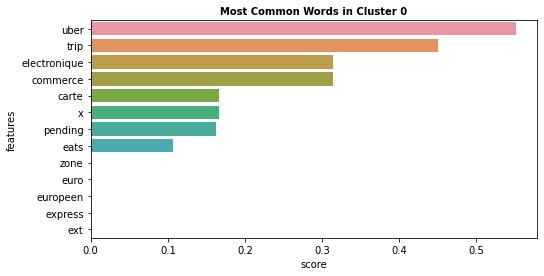

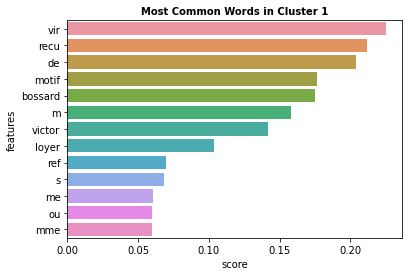

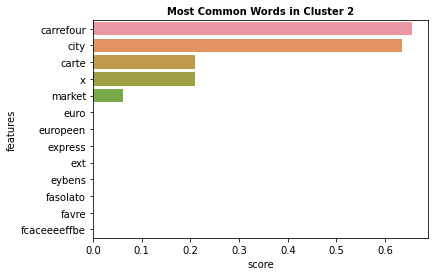

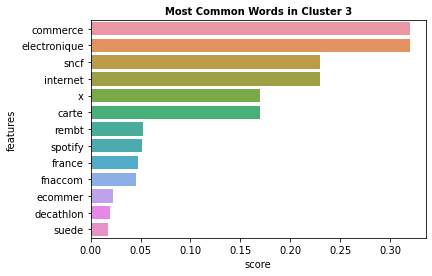

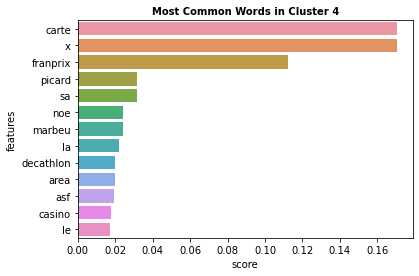

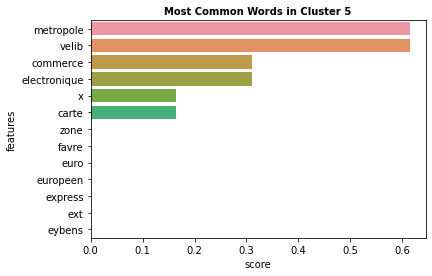

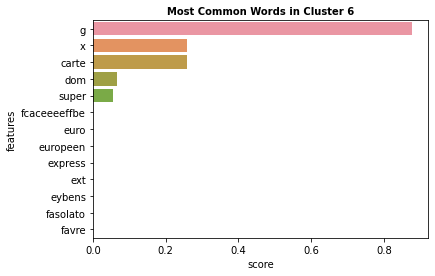

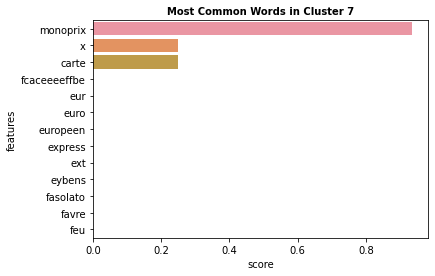

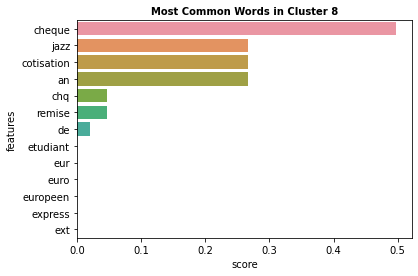

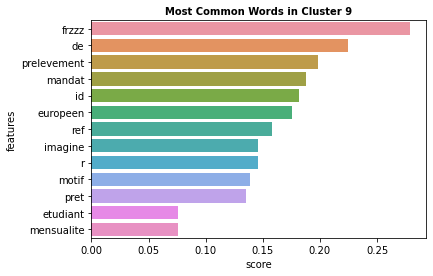

In [40]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [41]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,80, 3)
for k in K:
    km  = KMeans(n_clusters = k)
    km.fit(transformed)
    Sum_of_squared_distances.append(km.inertia_)

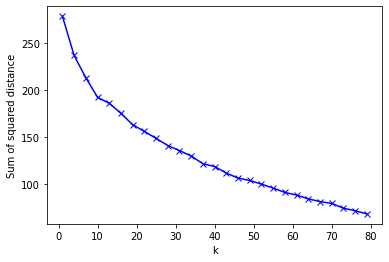

In [42]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.show()

In [43]:
svd = TruncatedSVD(n_components = 2, random_state = 0)
svd.fit(X = transformed)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5, random_state=0,
             tol=0.0)

In [44]:
svd.explained_variance_ratio_

array([0.05499065, 0.05226786])

In [45]:
reduced_features = svd.transform(transformed)

In [46]:
cls = MiniBatchKMeans(n_clusters = 10, random_state = 0)
cls.fit(transformed)
preds = cls.predict(transformed)
cls.labels_

array([4, 4, 4, 6, 5, 0, 0, 0, 0, 0, 4, 5, 0, 0, 4, 6, 0, 4, 0, 3, 0, 0,
       0, 6, 5, 0, 4, 4, 0, 6, 0, 0, 0, 0, 0, 5, 1, 0, 4, 4, 0, 0, 5, 5,
       0, 0, 5, 5, 5, 0, 0, 1, 6, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 3,
       1, 4, 6, 4, 0, 3, 5, 4, 4, 7, 6, 7, 7, 0, 3, 0, 0, 7, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 4,
       0, 2, 0, 0, 2, 0, 0, 6, 0, 3, 6, 0, 0, 0, 4, 7, 6, 0, 2, 7, 0, 2,
       0, 2, 7, 4, 0, 0, 0, 5, 7, 4, 0, 0, 2, 7, 0, 2, 0, 0, 0, 5, 5, 4,
       4, 4, 4, 5, 4, 0, 0, 2, 4, 2, 2, 6, 5, 0, 0, 0, 3, 5, 0, 0, 0, 0,
       4, 6, 0, 0, 0, 8, 5, 4, 0, 9, 5, 0, 0, 6, 0, 8, 5, 0, 0, 0, 0, 8,
       0, 9, 0, 4, 0, 0, 5, 0, 4, 3, 8, 0, 0, 8, 8, 0, 4, 0, 6, 9, 0, 0,
       4, 0, 3, 4, 0, 0, 4, 0, 0, 0, 0, 6, 0, 4, 6, 4, 4, 7, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 5, 0, 6, 0, 0, 0, 8, 0, 0, 4, 0,
       0, 0, 4, 4, 4, 8, 4, 0, 0, 7, 6, 4, 5, 5, 5, 0, 8, 0, 4, 4, 5, 4,
       4, 0, 4, 4, 4, 4, 0, 5, 8, 6, 0, 6, 4, 7])

In [47]:
reduced_cluster_c = svd.transform(cls.cluster_centers_) 

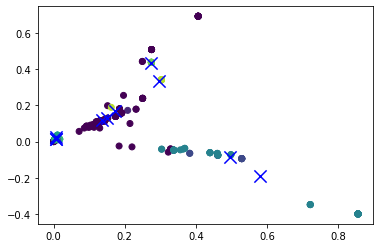

In [48]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(transformed))
plt.scatter(reduced_cluster_c[:, 0], reduced_cluster_c[:,1], marker='x', s=150, c='b')

### Use google search API to retrieve some additional information

In [ ]:
pip install google

In [ ]:
from googlesearch import search

In [ ]:
query = data.nature_operation[1]

In [ ]:
results = search(query, tld='com', lang='fr', num=5, start=0, stop=None, pause=2.0)